# Basic Text Analysis Workflow

(but really everything analysis workflow...)

1. Get data
2. Prepare data: clean, organize, slice and dice
3. Run tests
4. Generate questions

## 0. Preliminaries

In [1]:
import nltk, re, pprint
from nltk import word_tokenize

## 1. Get Data

... from a webpage

In [2]:
from urllib import request

In [3]:
url = "http://www.fsu.edu"

In [4]:
html = request.urlopen(url).read().decode('utf8')

In [5]:
html

'<!DOCTYPE html>\n<html lang="en-US" prefix="og: http://ogp.me/ns#">\n<head>\n    <meta charset="UTF-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Florida State University</title>\n    <meta name="author" content="Florida State University">\n    <meta name="description" content="FSU, designated a preeminent university in the state of Florida, is one of the most respected research and learning institutions in the country."/>\n\n    <link href="//cloud.webtype.com/css/83d58b53-6c1e-4957-b3f5-ca921f831767.css" rel="stylesheet" type="text/css" />\n\n    <link rel="stylesheet" type="text/css" href="/_/s3/css/bootstrap.min.css">\n    <link rel="stylesheet" type="text/css" href="/_/s3/css/strata.min.css">\n    <link rel="stylesheet" type="text/css" href="/_/s3/css/extend/strata-features.min.css">\n    <link rel="stylesheet" type="text/css" href="/_/local/css/homeFSU.min.css">\n    <link rel="sty

In [6]:
from bs4 import BeautifulSoup

In [7]:
raw = BeautifulSoup(html, "html.parser")

In [8]:
raw

<!DOCTYPE html>

<html lang="en-US" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Florida State University</title>
<meta content="Florida State University" name="author"/>
<meta content="FSU, designated a preeminent university in the state of Florida, is one of the most respected research and learning institutions in the country." name="description">
<link href="//cloud.webtype.com/css/83d58b53-6c1e-4957-b3f5-ca921f831767.css" rel="stylesheet" type="text/css"/>
<link href="/_/s3/css/bootstrap.min.css" rel="stylesheet" type="text/css"/>
<link href="/_/s3/css/strata.min.css" rel="stylesheet" type="text/css"/>
<link href="/_/s3/css/extend/strata-features.min.css" rel="stylesheet" type="text/css"/>
<link href="/_/local/css/homeFSU.min.css" rel="stylesheet" type="text/css"/>
<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/fon

In [9]:
raw.get_text()

'\n\n\n\n\n\nFlorida State University\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'//www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-5P9ZCB\');\n\n\n\n\nSkip to main content\n\n\n\n\xa0\nFlorida State University\n\n\n\nWebmail\nSearch FSU\nGlobal Navigation\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFSU Sites\nFaculty & Staff Directory\nDepartments & Services\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAcademics\nAdmissions\nResearch\nFaculty\nStudents\nVeterans\nSupport FSU\n\n\n\n\n\n\n\n\n\n\nGet to Know FSU\n\nAbout Florida State\nAdministration\nAthletics\nCollege Portrait (VSA)\nFSU\'s Economic Impact\nGlobal FSU\nMap of Campus\nVisitor Services\n\n\n\nNews & Events\n\nCalendar of Event

...from a file on the web

In [10]:
url = "http://classics.mit.edu/Homer/odyssey.mb.txt"

In [11]:
raw = request.urlopen(url).read().decode('utf8')

In [12]:
raw[1000:2000]

''

...from a local text file

In [13]:
raw = open('frankenstein.txt').read()

In [14]:
type(raw)

str

...from PDF!

!!! prerequesite: pip install PyPDF2 

In [15]:
import PyPDF2

In [16]:
pdfFileObj = open('6130-pdf.pdf', 'rb')

In [17]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [18]:
pdfReader.numPages

838

In [19]:

pageObj = pdfReader.getPage(0)

In [20]:
pageObj.extractText()

'TheProjectGutenbergEBookofTheIliadofHomerbyHomer\nThiseBookisfortheuseofanyoneanywhereatnocost\nandwithalmostnorestrictionswhatsoever.Youmaycopy\nit,giveitawayorre-useitunderthetermsoftheProject\nGutenbergLicenseincludedwiththiseBookoronlineat\nhttp://www.gutenberg.org/license\nTitle:TheIliadofHomer\nAuthor:Homer\nReleaseDate:September2006[Ebook6130]\nLanguage:English\n***STARTOFTHEPROJECTGUTENBERGEBOOK\nTHEILIADOFHOMER***\n'

## 2. Clean text

In [39]:
url = "http://digitalhumanities.org/dhq/vol/4/1/000080/000080.html"

In [40]:
html = request.urlopen(url).read().decode('utf8')

In [41]:
html

'<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE html\n  PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml"><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>DHQ: Digital Humanities Quarterly: The Landscape of Digital Humanities</title><link rel="stylesheet" type="text/css" href="/dhq/common/css/dhq.css"/><link rel="stylesheet" type="text/css" media="screen" href="/dhq/common/css/dhq_screen.css"/><link rel="stylesheet" type="text/css" media="print" href="/dhq/common/css/dhq_print.css"/><link rel="alternate" type="application/atom+xml" href="/dhq/feed/news.xml"/><link rel="shortcut icon" href="/dhq/common/images/favicon.ico"/><script type="text/javascript" src="/dhq/common/js/javascriptLibrary.js">\n                &lt;!-- Javascript functions --&gt;\n            </script><script type="text/javascript">\n\n var _gaq = _gaq || [];\n _gaq.push([\'_setAccount\', \'UA-158

In [42]:
from bs4 import BeautifulSoup

In [43]:
raw = BeautifulSoup(html, "html.parser")

In [44]:
raw

<?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE html
  PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><title>DHQ: Digital Humanities Quarterly: The Landscape of Digital Humanities</title><link href="/dhq/common/css/dhq.css" rel="stylesheet" type="text/css"/><link href="/dhq/common/css/dhq_screen.css" media="screen" rel="stylesheet" type="text/css"/><link href="/dhq/common/css/dhq_print.css" media="print" rel="stylesheet" type="text/css"/><link href="/dhq/feed/news.xml" rel="alternate" type="application/atom+xml"/><link href="/dhq/common/images/favicon.ico" rel="shortcut icon"/><script src="/dhq/common/js/javascriptLibrary.js" type="text/javascript">
                &lt;!-- Javascript functions --&gt;
            </script><script type="text/javascript">

 var _gaq = _gaq || [];
 _gaq.push(['_setAccount', 'UA-15812721-1']);

In [45]:
raw = raw.get_text()

In [46]:
raw

'\n\nDHQ: Digital Humanities Quarterly: The Landscape of Digital Humanities\n                &lt;!-- Javascript functions --&gt;\n            \n\n var _gaq = _gaq || [];\n _gaq.push([\'_setAccount\', \'UA-15812721-1\']);\n _gaq.push([\'_trackPageview\']);\n\n (function() {\n   var ga = document.createElement(\'script\'); ga.type =\n\'text/javascript\'; ga.async = true;\n   ga.src = (\'https:\' == document.location.protocol ? \'https://ssl\' :\n\'http://www\') + \'.google-analytics.com/ga.js\';\n   var s = document.getElementsByTagName(\'script\')[0];\ns.parentNode.insertBefore(ga, s);\n })();\n\n        <!--displays banner image-->homesubmissionsabout dhqdhq peoplecontact Current Issue2017: 11.2Preview Issue2017: 11.3Previous Issues2017: 11.12016: 10.42016: 10.32016: 10.22016: 10.12015: 9.42015: 9.32015: 9.22015: 9.12014: 8.42014: 8.32014: 8.22014: 8.12013: 7.32013: 7.22013: 7.12012: 6.32012: 6.22012: 6.12011: 5.32011: 5.22011: 5.12010: 4.22010: 4.12009: 3.42009: 3.32009: 3.22009: 3.12

In [47]:
raw.find("Abstract")

1439

In [48]:
raw.rfind("Print Article")

184093

In [49]:
raw = raw[1439:184093]

In [50]:
raw

'Abstract\nThe digital humanities is increasingly becoming a "buzzword",\n            and there is more and more talk about a broadly conceived, inclusive digital humanities.\n            The field is expanding and at the same time being negotiated, and this article explores\n            the idea of a broadly conceived landscape of digital humanities in some depth. It is\n            argued that awareness across this landscape is important to the future of the field. The\n            study starts out from typologies of digital humanities, a "flythrough" of the\n            landscape, and a discussion of what being a digital humanist entails. The second part is\n            an exploration of four concrete encounters: ACTLab at University of Texas at Austin, the Humanities Arts Science Technology Advanced Collaboratory (HASTAC), the Humanities Computing Program at the University of Alberta, and Internet Studies. In the third part of the article, it is suggested that a model based on para

### Slice and Dice

In [51]:
tokens = nltk.wordpunct_tokenize(raw)

In [68]:
type(tokens)

list

In [80]:
text = nltk.Text(tokens)

In [81]:
type(text)

nltk.text.Text

In [82]:
len(text)

30132

#### Cut into tokens (words)

In [69]:
tokens

['Abstract',
 'The',
 'digital',
 'humanities',
 'is',
 'increasingly',
 'becoming',
 'a',
 '"',
 'buzzword',
 '",',
 'and',
 'there',
 'is',
 'more',
 'and',
 'more',
 'talk',
 'about',
 'a',
 'broadly',
 'conceived',
 ',',
 'inclusive',
 'digital',
 'humanities',
 '.',
 'The',
 'field',
 'is',
 'expanding',
 'and',
 'at',
 'the',
 'same',
 'time',
 'being',
 'negotiated',
 ',',
 'and',
 'this',
 'article',
 'explores',
 'the',
 'idea',
 'of',
 'a',
 'broadly',
 'conceived',
 'landscape',
 'of',
 'digital',
 'humanities',
 'in',
 'some',
 'depth',
 '.',
 'It',
 'is',
 'argued',
 'that',
 'awareness',
 'across',
 'this',
 'landscape',
 'is',
 'important',
 'to',
 'the',
 'future',
 'of',
 'the',
 'field',
 '.',
 'The',
 'study',
 'starts',
 'out',
 'from',
 'typologies',
 'of',
 'digital',
 'humanities',
 ',',
 'a',
 '"',
 'flythrough',
 '"',
 'of',
 'the',
 'landscape',
 ',',
 'and',
 'a',
 'discussion',
 'of',
 'what',
 'being',
 'a',
 'digital',
 'humanist',
 'entails',
 '.',
 'The'

In [56]:
type(tokens)

list

#### make a word list

In [70]:
words = [w.lower() for w in tokens]

In [71]:
vocab = sorted(set(words))

In [72]:
vocab

['!',
 '"',
 '")',
 '").',
 '"+\'',
 '",',
 '".',
 '":',
 '"[',
 '#',
 '%',
 '&',
 "'",
 '(',
 '("',
 '([',
 ')',
 ')".',
 '),',
 ').',
 ').[',
 '):',
 ')[',
 "+'",
 ',',
 ',"',
 ',%',
 ",'",
 ',[',
 '-',
 '-.',
 '-]',
 '.',
 '."',
 '.%',
 '.)',
 '.).',
 '.,',
 '.-',
 '...',
 '...".',
 '.[',
 '/',
 '/),',
 '/).',
 '/.',
 '/.[',
 '/?',
 '/~',
 '0',
 '000',
 '000952',
 '001004',
 '002557',
 '01',
 '03',
 '0346',
 '04',
 '05',
 '07',
 '08',
 '09',
 '1',
 '10',
 '1009',
 '100ce',
 '101in',
 '102',
 '102in',
 '103different',
 '104the',
 '105',
 '105computers',
 '106interestingly',
 '107increasingly',
 '108here',
 '109there',
 '10necessarily',
 '11',
 '110',
 '110the',
 '111another',
 '112pliny',
 '113',
 '113a',
 '114this',
 '115there',
 '116',
 '116further',
 '117digital',
 '118information',
 '119',
 '119the',
 '11together',
 '12',
 '120this',
 '121davidson',
 '122let',
 '123',
 '123returning',
 '124the',
 '125',
 '125we',
 '126in',
 '127this',
 '128',
 '128in',
 '129the',
 '12in',
 '13',


## 3. Run tests

In [83]:
tagged_text = nltk.pos_tag(text)

In [84]:
tagged_text

[('Abstract', 'VB'),
 ('The', 'DT'),
 ('digital', 'JJ'),
 ('humanities', 'NNS'),
 ('is', 'VBZ'),
 ('increasingly', 'RB'),
 ('becoming', 'VBG'),
 ('a', 'DT'),
 ('"', 'JJ'),
 ('buzzword', 'NN'),
 ('",', 'NN'),
 ('and', 'CC'),
 ('there', 'EX'),
 ('is', 'VBZ'),
 ('more', 'JJR'),
 ('and', 'CC'),
 ('more', 'RBR'),
 ('talk', 'NN'),
 ('about', 'IN'),
 ('a', 'DT'),
 ('broadly', 'RB'),
 ('conceived', 'VBN'),
 (',', ','),
 ('inclusive', 'JJ'),
 ('digital', 'JJ'),
 ('humanities', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('field', 'NN'),
 ('is', 'VBZ'),
 ('expanding', 'VBG'),
 ('and', 'CC'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('time', 'NN'),
 ('being', 'VBG'),
 ('negotiated', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('this', 'DT'),
 ('article', 'NN'),
 ('explores', 'VBZ'),
 ('the', 'DT'),
 ('idea', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('broadly', 'RB'),
 ('conceived', 'JJ'),
 ('landscape', 'NN'),
 ('of', 'IN'),
 ('digital', 'JJ'),
 ('humanities', 'NNS'),
 ('in', 'IN'),
 ('some', 'DT'),
 ('d

In [66]:
type(tagged_text)

list

In [85]:
tag_fd = nltk.FreqDist(tag for (word, tag) in tagged_text)

In [86]:
tag_fd.most_common()

[('NN', 4405),
 ('IN', 3277),
 ('JJ', 2963),
 ('DT', 2587),
 ('NNP', 2385),
 ('NNS', 2065),
 (',', 1450),
 ('CC', 1326),
 ('.', 1183),
 ('RB', 1174),
 ('CD', 986),
 ('VB', 735),
 ('VBZ', 731),
 ('VBN', 624),
 ('VBP', 528),
 ('VBG', 516),
 ('TO', 499),
 (':', 468),
 ('PRP', 439),
 ('VBD', 297),
 ('MD', 290),
 ('(', 229),
 ('WDT', 128),
 ('PRP$', 114),
 ('EX', 107),
 ('RBR', 89),
 ('WRB', 79),
 (')', 75),
 ('JJR', 63),
 ('NNPS', 58),
 ('WP', 54),
 ('$', 34),
 ('JJS', 32),
 ('RP', 29),
 ('#', 26),
 ("''", 22),
 ('POS', 21),
 ('FW', 14),
 ('SYM', 12),
 ('RBS', 7),
 ('PDT', 7),
 ('WP$', 4)]

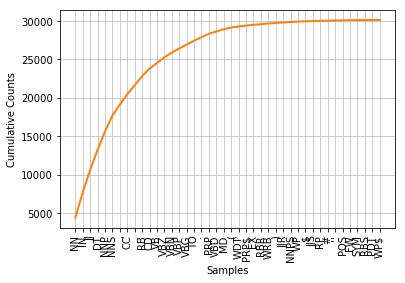

In [88]:
tag_fd.plot(cumulative=True)

In [2]:
from nltk.corpus import brown

In [3]:
suffix_fdist = nltk.FreqDist()

In [4]:
for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1

In [5]:
common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]

In [6]:
print(common_suffixes)

['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of', 'the', 'y', 'r', 'to', 'in', 'f', 'o', 'ed', 'nd', 'is', 'on', 'l', 'g', 'and', 'ng', 'er', 'as', 'ing', 'h', 'at', 'es', 'or', 're', 'it', '``', 'an', "''", 'm', ';', 'i', 'ly', 'ion', 'en', 'al', '?', 'nt', 'be', 'hat', 'st', 'his', 'th', 'll', 'le', 'ce', 'by', 'ts', 'me', 've', "'", 'se', 'ut', 'was', 'for', 'ent', 'ch', 'k', 'w', 'ld', '`', 'rs', 'ted', 'ere', 'her', 'ne', 'ns', 'ith', 'ad', 'ry', ')', '(', 'te', '--', 'ay', 'ty', 'ot', 'p', 'nce', "'s", 'ter', 'om', 'ss', ':', 'we', 'are', 'c', 'ers', 'uld', 'had', 'so', 'ey']


In [7]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

In [8]:
tagged_words = brown.tagged_words(categories='news')

In [9]:
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]

In [10]:
size = int(len(featuresets) * 0.1)

In [11]:
train_set, test_set = featuresets[size:], featuresets[:size]

In [104]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [105]:
nltk.classify.accuracy(classifier, test_set)

0.6270512182993535

In [106]:
classifier.classify(pos_features('crickets'))

'NNS'

In [108]:
print(classifier.pseudocode(depth=4))

if endswith(the) == False: 
  if endswith(,) == False: 
    if endswith(s) == False: 
      if endswith(.) == False: return '.'
      if endswith(.) == True: return '.'
    if endswith(s) == True: 
      if endswith(is) == False: return 'PP$'
      if endswith(is) == True: return 'BEZ'
  if endswith(,) == True: return ','
if endswith(the) == True: return 'AT'



In [12]:
classifier_bayesian = nltk.NaiveBayesClassifier.train(train_set)

In [13]:
classifier_bayesian.classify(pos_features('crickets'))

'NNS'

In [17]:
classifier_bayesian.classify(pos_features('jumped'))

'VBN'

In [18]:
classifier_bayesian.show_most_informative_features(15)

Most Informative Features
             endswith(.) = True                . : NN     =   6986.9 : 1.0
            endswith(es) = True              DOZ : IN     =   6236.0 : 1.0
            endswith(we) = True           PPSS-H : NN     =   5866.5 : 1.0
            endswith(he) = True            AT-TL : NN     =   4262.2 : 1.0
           endswith(are) = True              BER : NP     =   4244.5 : 1.0
             endswith(a) = True            NN-NC : IN     =   3343.5 : 1.0
            endswith(th) = True              ABX : NNS    =   2969.0 : 1.0
             endswith(h) = True              ABX : NNS    =   2969.0 : 1.0
             endswith(r) = True              DTX : NNS    =   2825.1 : 1.0
           endswith(hat) = True               CS : NN     =   2727.0 : 1.0
            endswith(of) = True            IN-TL : NN     =   2660.7 : 1.0
           endswith(uld) = True            MD-HL : NP     =   2657.1 : 1.0
            endswith(to) = True               TO : JJ     =   2618.1 : 1.0

In [14]:
print(nltk.classify.accuracy(classifier_bayesian, test_set))

KeyboardInterrupt: 